<a href="https://colab.research.google.com/github/v5v5/trading/blob/main/trade_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

URL to download quotes EURUSD

https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=1262304000&period2=1619654400&interval=1d&events=history&includeAdjustedClose=true

In [1370]:
import pandas as pd
from urllib.request import Request, urlopen
from io import StringIO
import datetime
from dateutil.relativedelta import relativedelta
import time
import random
import math
import matplotlib.pyplot as plt

In [1371]:
# dt_from = datetime.date(2000,1,1)
# dt_from = datetime.date(2019,1,1)
# dt_from = datetime.date.today() + relativedelta(years=-1)
dt_from = datetime.date.today() + relativedelta(years=-2)
ut_from = str(int(time.mktime(dt_from.timetuple())))
ut_from

'1557792000'

In [1372]:
dt_to = datetime.date.today()
ut_to = str(int(time.mktime(dt_to.timetuple())))
ut_to

'1620950400'

In [1373]:
# url='https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=1262304000&period2=1619654400&interval=1d&events=history&includeAdjustedClose=true'
url='https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=' + ut_from + '&period2=' + ut_to + '&interval=1d&events=history&includeAdjustedClose=true'

In [1374]:
headers={'User-Agent': 'Mozilla/5.0'}

In [1375]:
req = Request(url, headers=headers)

In [1376]:
page = urlopen(req)
# page = urlopen(url)

In [1377]:
page = urlopen(url)

In [1378]:
content = page.read()

In [1379]:
text = content.decode('UTF-8')

In [1380]:
print(text[:300])

Date,Open,High,Low,Close,Adj Close,Volume
2019-05-14,1.123242,1.124606,1.120486,1.123255,1.123255,0
2019-05-15,1.120360,1.122272,1.118043,1.120448,1.120448,0
2019-05-16,1.120951,1.122435,1.117431,1.120724,1.120724,0
2019-05-17,1.117481,1.118443,1.115735,1.117356,1.117356,0
2019-05-20,1.116532,1.1177


In [1381]:
data = StringIO(text)

In [1382]:
df1 = pd.read_csv(data, sep=',', header='infer')

In [1383]:
df1.tail(7)

,Date,Open,High,Low,Close,Adj Close,Volume
517,2021-05-06,1.200913,1.207001,1.199400,1.200797,1.200797,0.0
518,2021-05-07,1.206593,1.216545,1.205342,1.206855,1.206855,0.0
519,2021-05-10,1.216752,1.217730,1.213740,1.217108,1.217108,0.0
520,2021-05-11,1.214211,1.217968,1.212547,1.214093,1.214093,0.0
521,2021-05-12,1.214550,1.215067,1.206811,1.214450,1.214450,0.0
522,2021-05-13,1.207686,1.210654,1.205313,1.207851,1.207851,0.0
523,2021-05-14,1.208459,1.210361,1.207584,1.210214,1.210214,0.0


In [1384]:
# df1[df1['Open'].isna()]
len(df1[df1['Open'].isna()].index)

21

In [1385]:
df1.sort_values(by=['Date'], inplace=True)

In [1386]:
df1.dropna(inplace=True)
df1.reset_index(inplace=True)
df1

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-05-14,1.123242,1.124606,1.120486,1.123255,1.123255,0.0
1,1,2019-05-15,1.120360,1.122272,1.118043,1.120448,1.120448,0.0
2,2,2019-05-16,1.120951,1.122435,1.117431,1.120724,1.120724,0.0
3,3,2019-05-17,1.117481,1.118443,1.115735,1.117356,1.117356,0.0
4,4,2019-05-20,1.116532,1.117701,1.115126,1.116532,1.116532,0.0
...,...,...,...,...,...,...,...,...
498,519,2021-05-10,1.216752,1.217730,1.213740,1.217108,1.217108,0.0
499,520,2021-05-11,1.214211,1.217968,1.212547,1.214093,1.214093,0.0
500,521,2021-05-12,1.214550,1.215067,1.206811,1.214450,1.214450,0.0
501,522,2021-05-13,1.207686,1.210654,1.205313,1.207851,1.207851,0.0


In [1387]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

In [1388]:
df1['DayOfWeek'] = df1['Date'].dt.dayofweek

In [1389]:
df1.tail(7)

,index,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek
496,517,2021-05-06,1.200913,1.207001,1.199400,1.200797,1.200797,0.0,3
497,518,2021-05-07,1.206593,1.216545,1.205342,1.206855,1.206855,0.0,4
498,519,2021-05-10,1.216752,1.217730,1.213740,1.217108,1.217108,0.0,0
499,520,2021-05-11,1.214211,1.217968,1.212547,1.214093,1.214093,0.0,1
500,521,2021-05-12,1.214550,1.215067,1.206811,1.214450,1.214450,0.0,2
501,522,2021-05-13,1.207686,1.210654,1.205313,1.207851,1.207851,0.0,3
502,523,2021-05-14,1.208459,1.210361,1.207584,1.210214,1.210214,0.0,4


In [1390]:
df2 = df1.drop(['High','Low', 'Adj Close', 'Volume'], axis=1)

In [1391]:
df2.tail(7)

,index,Date,Open,Close,DayOfWeek
496,517,2021-05-06,1.200913,1.200797,3
497,518,2021-05-07,1.206593,1.206855,4
498,519,2021-05-10,1.216752,1.217108,0
499,520,2021-05-11,1.214211,1.214093,1
500,521,2021-05-12,1.214550,1.214450,2
501,522,2021-05-13,1.207686,1.207851,3
502,523,2021-05-14,1.208459,1.210214,4


In [1392]:
df2['Close-1'] = df2['Close'].shift(1)
df2['Open-1'] = df2['Open'].shift(1)

In [1393]:
df2.tail(7)

,index,Date,Open,Close,DayOfWeek,Close-1,Open-1
496,517,2021-05-06,1.200913,1.200797,3,1.201504,1.201634
497,518,2021-05-07,1.206593,1.206855,4,1.200797,1.200913
498,519,2021-05-10,1.216752,1.217108,0,1.206855,1.206593
499,520,2021-05-11,1.214211,1.214093,1,1.217108,1.216752
500,521,2021-05-12,1.214550,1.214450,2,1.214093,1.214211
501,522,2021-05-13,1.207686,1.207851,3,1.214450,1.214550
502,523,2021-05-14,1.208459,1.210214,4,1.207851,1.207686


In [1394]:
df2['%Close'] = (df2['Close'] - df2['Close-1']) / df2['Close-1'] * 100
df2['%Open'] = (df2['Open'] - df2['Open-1']) / df2['Open-1'] * 100

In [1395]:
df2 = df2.drop(['Close','Close-1', '%Close'], axis=1)

In [1396]:
df2.head(7)

,index,Date,Open,DayOfWeek,Open-1,%Open
0,0,2019-05-14,1.123242,1,NaN,NaN
1,1,2019-05-15,1.120360,2,1.123242,-0.256579
2,2,2019-05-16,1.120951,3,1.120360,0.052751
3,3,2019-05-17,1.117481,4,1.120951,-0.309559
4,4,2019-05-20,1.116532,0,1.117481,-0.084923
5,5,2019-05-21,1.116944,1,1.116532,0.036900
6,7,2019-05-23,1.115511,3,1.116944,-0.128296


In [1397]:
# take decision to buy or sell - if price = 1.167072 then buy = -1.167072 or sell = 1.167072
def take_decision(index):
  row = df2.loc[index]
  return random.choice([-row['Open'], +row['Open']])

In [1398]:
def is_guessed(index):
  if (index < 1):
    return True
  return (math.copysign(1, df2.loc[index]['%Open']) != math.copysign(1, df2.loc[index - 1]['decision']))

In [1399]:
def make_deal(index):
  k = df2.loc[index, 'k'] 
  decision = df2.loc[index, 'decision'] 
  return decision * (2 ** k)

In [1400]:
def discover_trend(index):
  if (index < 1):
    df2.loc[index, 'trend'] = 0
    return
  open_curr = df2.loc[index, '%Open']
  open_prev = df2.loc[index-1, '%Open']
  if (math.copysign(1, open_prev) == math.copysign(1, open_curr)):
    df2.loc[index, 'trend'] = df2.loc[index-1, 'trend'] + 1
  else:
    df2.loc[index, 'trend'] = 0

In [1401]:
# this is a main algorithm for trading
def trade():
  for index, row in df2.iterrows():
    # close previous deal
    if index < 1:
      df2.loc[index, 'result after close'] = 0
    else:
      df2.loc[index, 'result after close'] = df2.loc[index - 1, 'result after close'] + df2.loc[index - 1, 'deal'] + \
        (2 ** df2.loc[index - 1, 'k']) * df2.loc[index, 'Open']

    # coefficient of deal depends on result of previous deal
    if (is_guessed(index)):
      k = 0
    else:
      k += 1
    df2.loc[index, 'k'] = k

    # take decision
    df2.loc[index, 'decision'] = take_decision(index)

    # make deal
    df2.loc[index, 'deal'] = make_deal(index)

    # open new deal
    if (index < 1):
      df2.loc[index, 'result'] = 0
    else:
      df2.loc[index, 'result'] = df2.loc[index, 'result after close'] + df2.loc[index, 'deal']
    
    # определяем тренд
    discover_trend(index)

In [1402]:
trade()

In [1403]:
df2.tail(15)

,index,Date,Open,DayOfWeek,Open-1,%Open,result after close,k,decision,deal,result,trend
488,509,2021-04-26,1.208956,0,1.201793,0.596026,4796.792347,0.0,1.208956,1.208956,4798.001303,0.0
489,510,2021-04-27,1.207921,1,1.208956,-0.085611,4799.209224,0.0,-1.207921,-1.207921,4798.001303,0.0
490,511,2021-04-28,1.208854,2,1.207921,0.077240,4799.210157,0.0,-1.208854,-1.208854,4798.001303,0.0
491,512,2021-04-29,1.213578,3,1.208854,0.390783,4799.214881,0.0,-1.213578,-1.213578,4798.001303,1.0
492,513,2021-04-30,1.212489,4,1.213578,-0.089735,4799.213792,1.0,1.212489,2.424978,4801.638770,0.0
493,514,2021-05-03,1.202646,0,1.212489,-0.811801,4804.044062,0.0,1.202646,1.202646,4805.246708,1.0
494,515,2021-05-04,1.205982,1,1.202646,0.277388,4806.452690,1.0,1.205982,2.411964,4808.864654,0.0
495,516,2021-05-05,1.201634,2,1.205982,-0.360536,4811.267922,0.0,1.201634,1.201634,4812.469556,0.0
496,517,2021-05-06,1.200913,3,1.201634,-0.060002,4813.670469,0.0,-1.200913,-1.200913,4812.469556,1.0
497,518,2021-05-07,1.206593,4,1.200913,0.472973,4813.676149,0.0,-1.206593,-1.206593,4812.469556,0.0


In [1404]:
df2.describe()

,index,Open,DayOfWeek,Open-1,%Open,result after close,k,decision,deal,result,trend
count,503.000000,503.000000,503.000000,502.000000,502.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,268.606362,1.145789,2.001988,1.145664,0.015402,2662.762274,1.105368,-0.002643,-2.617813,2660.146694,1.053678
std,150.348997,0.044852,1.416323,0.044809,0.408680,1444.090228,1.681523,1.147803,69.052641,1447.275847,1.383994
min,0.000000,1.065848,0.000000,1.065848,-2.603845,-0.002882,0.000000,-1.233776,-1136.893952,-2.243602,0.000000
25%,146.500000,1.108955,1.000000,1.108931,-0.243338,2065.864985,0.000000,-1.127231,-1.221312,2064.202757,0.000000
50%,272.000000,1.127548,2.000000,1.127414,0.017797,3360.077323,0.000000,-1.065848,-1.077633,3360.064755,1.000000
75%,397.500000,1.186205,3.000000,1.185793,0.264688,3768.310732,2.000000,1.127631,2.173784,3767.124246,2.000000
max,523.000000,1.233776,4.000000,1.233776,1.456985,4825.806649,10.000000,1.226873,567.539200,4828.223567,7.000000


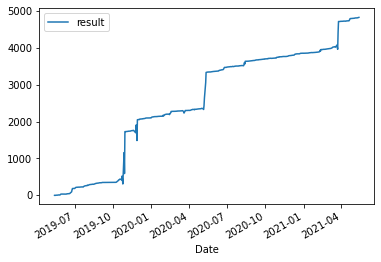

In [1405]:
df2.plot('Date', 'result')

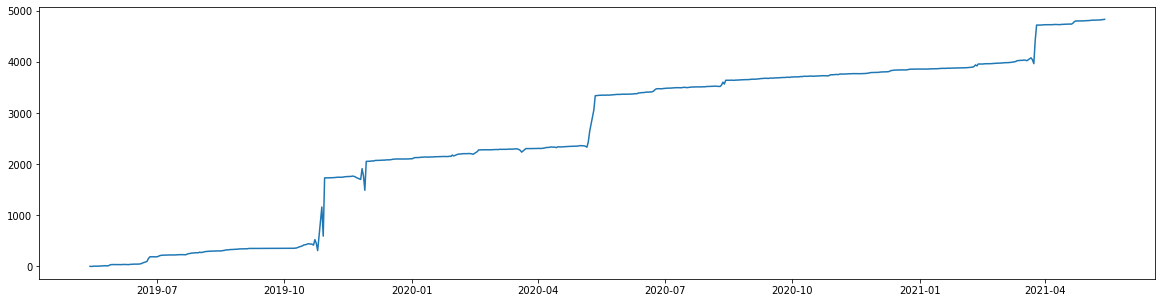

In [1406]:
plt.figure(figsize=(20,5))
plt.plot(df2['Date'], df2['result'])

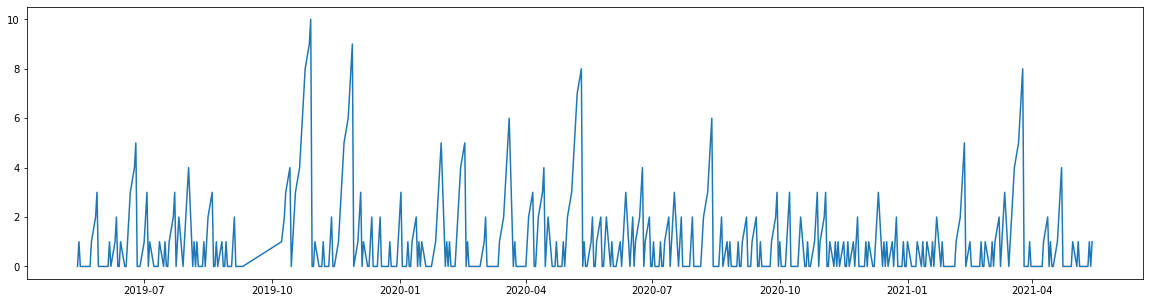

In [1407]:
plt.figure(figsize=(20,5))
plt.plot(df2['Date'], df2['k'])